In [9]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [10]:
X , y = make_regression(n_samples=100, n_features=1,n_informative=1,n_targets=1, noise=20 , random_state=13)

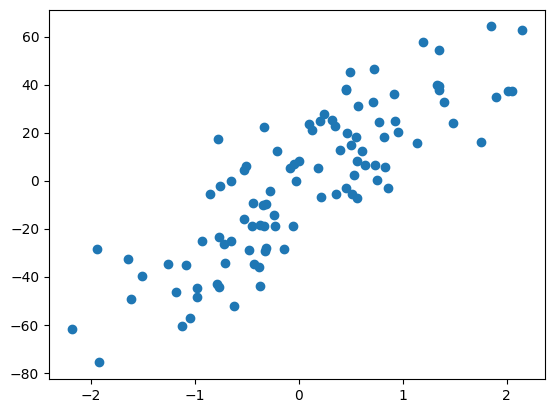

In [11]:
plt.scatter(X,y)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print("Coef :",lr.coef_)
print("Intercept :",lr.intercept_)

Coef : [27.82809103]
Intercept : -2.29474455867698


In [13]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = 10)
rr.fit(X,y)
print("Coef :",rr.coef_)
print("Intercept :",rr.intercept_)

Coef : [24.9546267]
Intercept : -2.1269130035235735


In [14]:
from sklearn.linear_model import Ridge
rr1 = Ridge(alpha = 100)
rr1.fit(X,y)
print("Coef :",rr1.coef_)
print("Intercept :",rr1.intercept_)

Coef : [12.93442104]
Intercept : -1.4248441496033308


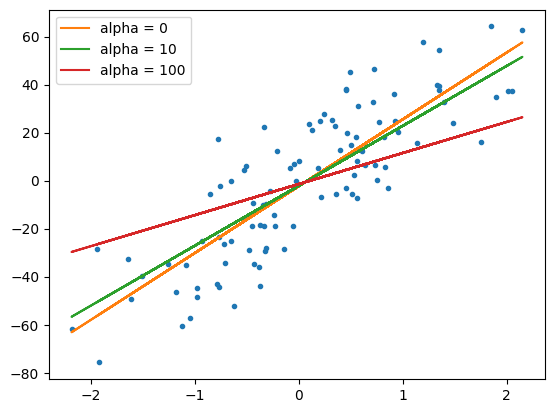

In [22]:
plt.plot(X,y,'.')
plt.plot(X,lr.predict(X),'-' , label = "alpha = 0")
plt.plot(X,rr.predict(X),'-', label = "alpha = 10")
plt.plot(X,rr1.predict(X),'-', label = "alpha = 100")
plt.legend()
plt.show()

# **Custom Class for Ridge Regression**

In [28]:
class MeraRidge:
  def __init__(self,alpha = 0.1):
    self.alpha = alpha
    self.m = None
    self.b = None

  def fit(self,X_train,y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = num +  (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
      den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
    self.m = num/(den + self.alpha)
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)

  def predict(self,X_test):
    pass

reg = MeraRidge(alpha = 100)
reg.fit(X,y)

[12.93442104]
[-1.42484415]


# **Custom Class for Ridge Regression n-Dimensional Data**

In [29]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.metrics import r2_score


In [30]:
X,y = load_diabetes(return_X_y=True)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.1 , solver= "cholesky")
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.45199494197195456

In [33]:
print("Coef: ",reg.coef_)
print("Intercept : ",reg.intercept_)

Coef:  [   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
Intercept :  151.92546856900984


# **Custom Ridge Regression code for n-Dimensional Data**

In [36]:
class MeraRidge:
  def __init__(self,alpha = 0.1):
    self.alpha = alpha
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train,
                        0, #Position or Index
                        1, # Value to be added
                        axis=1) ## Axes

    I = np.identity(X_train.shape[1])
    I[0][0] = 0
    result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
    self.intercept_ = result[0]
    self.coef_ = result[1:]

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_


reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("R2 Score  : " , r2_score(y_test,y_pred))
print("Coef : ",reg.coef_)
print("Intecept : ",reg.intercept_)

R2 Score  :  0.45199494197195456
Coef :  [   6.64373321 -172.23747375  485.52958514  314.67584612  -72.94020918
  -80.58868817 -174.46352722   83.61470987  484.36531622   73.58509056]
Intecept :  151.9254685690099
